In [1]:
import sys
sys.path.append("..")

import RidgeTrough.lines as lines
from RidgeTrough.lines import grads, max_grads, ridge_gif
from RidgeTrough.cdf_data import CDFData
import matplotlib.pyplot as plt
import os

In [11]:
hgt_path = r"../data/hgts" # TODO: change this to wherever your hgts directory is

year = 2012

# change yr_range to desired years
# change smooth_sigma to desired smoothing parameters
data = lines.FullCDFData(hgt_path, yr_range=(year, year), smooth_sigma=(1.,1.,1.))

# change prominence, distance parameters
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.find_peaks.html
finder = lines.CritPointFinder(prominence=2, distance=2)
peaks, troughs = finder(data)

cps = lines.CritPoints(data, troughs, peaks)

getting gradients: 100%|██████████| 366/366 [00:01<00:00, 317.56it/s]


Text(0.5, 0.98, 'Year: 2012 Day: 1 Level: 5')

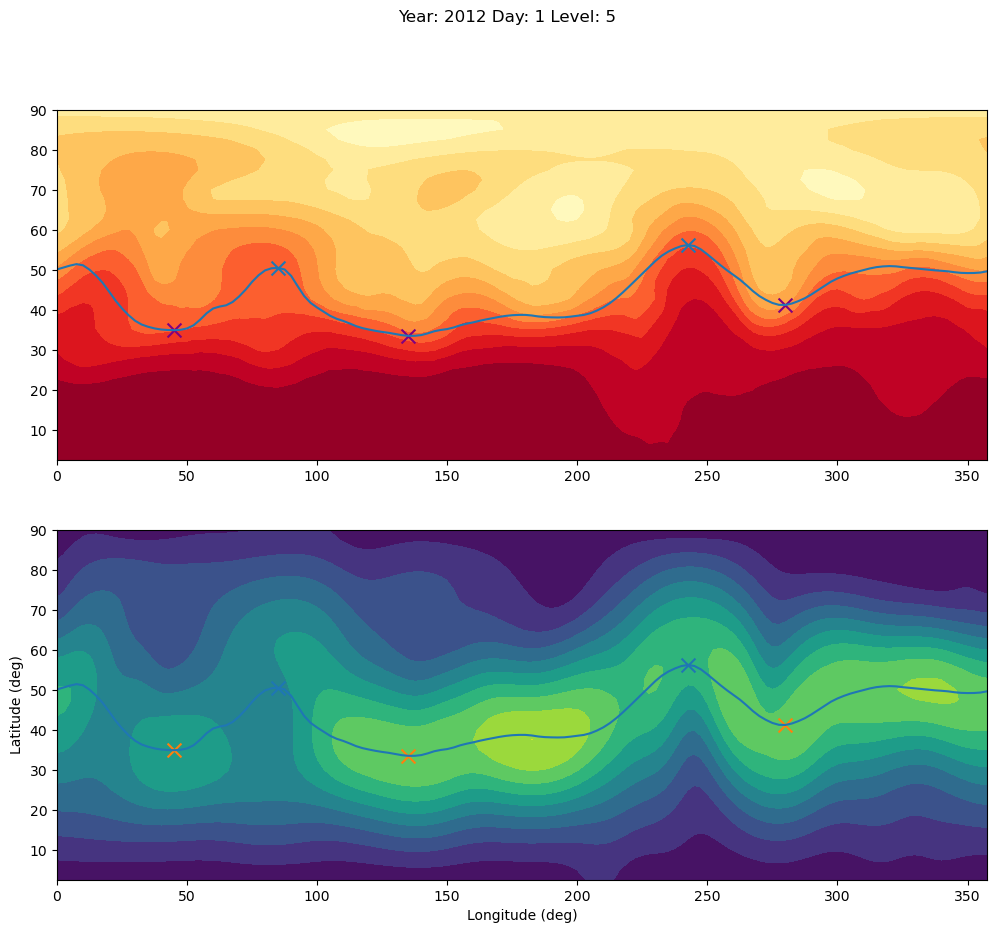

In [15]:
day = 1
level = 5
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,10))
cps.plot_ax(ax1, day, level)
cps.plot_grads_ax(ax2, day , level)
ax2.set_xlabel("Longitude (deg)")
ax2.set_ylabel("Latitude (deg)")
fig.suptitle(f"Year: {year} Day: {day} Level: {level}")

# To Save

In [8]:
fig.savefig(f"{year}-{day}-{level}.pdf")

# To export as CSV

In [20]:
import csv

write_level = 5

with open('trough_lats.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile, delimiter=',', quotechar='|', quoting=csv.QUOTE_MINIMAL)
    for day_data in cps.peak_lats:
        writer.writerow(day_data[write_level])

with open('trough_lons.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile, delimiter=',', quotechar='|', quoting=csv.QUOTE_MINIMAL)
    for day_data in cps.peak_lons:
        writer.writerow(day_data[write_level])

with open('peak_lats.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile, delimiter=',', quotechar='|', quoting=csv.QUOTE_MINIMAL)
    for day_data in cps.trough_lats:
        writer.writerow(day_data[write_level])

with open('peak_lons.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile, delimiter=',', quotechar='|', quoting=csv.QUOTE_MINIMAL)
    for day_data in cps.trough_lons:
        writer.writerow(day_data[write_level])